Here is the code for Problem 5. As what expected in the home work, I have calculated number of white regions considering 4 neighbors and 8 neighbors, also I have considered a new feature that is the summation of all cells of a image (Value_summation). I added these 3 new features at the end of input files and trained my network using keras. You can find the results at the bottom.

In [1]:
import numpy as np
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
from copy import copy, deepcopy
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
def return_next(visited, stack, counter):
    dim = len(visited)
    for col in range(dim):
        for row in range(dim):
            if not visited[row][col]:
                stack.append((row, col))
                counter += 1
                return stack, counter

In [0]:
def CC_counter_four(matrix):
    visited = deepcopy(matrix)
    dim = len(matrix)
    for col in range(dim):
        for row in range(dim):
            if matrix[row][col] == 0:
                visited[row][col] = False
            else:
                visited[row][col] = True
    
    stack = []
    counter = 0

    while not all(v for row in visited for v in row):
        if not stack:
            stack, counter = return_next(visited, stack, counter)
            
        popped = stack.pop()
        visited[popped[0]][popped[1]] = True
        if popped[0] - 1 >= 0 and not visited[popped[0] - 1][popped[1]]:
            stack.append((popped[0] - 1, popped[1]))
        if popped[0] + 1 < dim and not visited[popped[0] + 1][popped[1]]:
            stack.append((popped[0] + 1, popped[1]))
        if popped[1] - 1 >= 0 and not visited[popped[0]][popped[1] - 1]:
            stack.append((popped[0], popped[1] - 1))
        if popped[1] + 1 < dim and not visited[popped[0]][popped[1] + 1]:
            stack.append((popped[0], popped[1] + 1))
                
    return counter

In [0]:
def CC_counter_eight(matrix):
    visited = deepcopy(matrix)
    dim = len(matrix)
    for col in range(dim):
        for row in range(dim):
            if matrix[row][col] == 0:
                visited[row][col] = False
            else:
                visited[row][col] = True
    stack = []
    counter = 0

    while not all(v for row in visited for v in row):
        if not stack:
            stack, counter = return_next(visited, stack, counter)
            
        popped = stack.pop()
        visited[popped[0]][popped[1]] = True
        if popped[0] - 1 >= 0 and not visited[popped[0] - 1][popped[1]]:
            stack.append((popped[0] - 1, popped[1]))
        if popped[0] + 1 < dim and not visited[popped[0] + 1][popped[1]]:
            stack.append((popped[0] + 1, popped[1]))
        if popped[1] - 1 >= 0 and not visited[popped[0]][popped[1] - 1]:
            stack.append((popped[0], popped[1] - 1))
        if popped[1] + 1 < dim and not visited[popped[0]][popped[1] + 1]:
            stack.append((popped[0], popped[1] + 1))
        if popped[0] + 1 < dim and popped[1] + 1 < dim and not visited[popped[0] + 1][popped[1] + 1]:
            stack.append((popped[0] + 1,popped[1] + 1))
        if popped[0] - 1 >= 0 and popped[1] - 1 >= 0 and not visited[popped[0] - 1][popped[1] - 1]:
            stack.append((popped[0] - 1,popped[1] - 1))
        if popped[0] - 1 >= 0 and popped[1] + 1 < dim and not visited[popped[0] - 1][popped[1] + 1]:
            stack.append((popped[0] - 1,popped[1] + 1))
        if popped[0] + 1 < dim and popped[1] - 1 >= 0 and not visited[popped[0] + 1][popped[1] - 1]:
            stack.append((popped[0] + 1,popped[1] - 1))
    
                
    return counter

In [0]:
def Value_summation(matrix):
        return sum(map(sum, matrix))

In [0]:
# data load
(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

batch_size = 128
num_classes = 10
epochs = 12
train_size = 60000
test_size = 10000

# input image dimensions
img_rows, img_cols = 28, 28

# data reshape and black and white
train_images = train_images_original.reshape((train_size, 28 * 28))
train_images = train_images.astype('float32') / 255.0

test_images = test_images_original.reshape((test_size, 28 * 28))
test_images = test_images.astype('float32') / 255.0

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)


for i in range(train_size):
    np.append(train_images[i],CC_counter_four(train_images_original[i].astype('float32') / 255.0)/4.0)
    np.append(train_images[i],CC_counter_eight(train_images_original[i].astype('float32') / 255.0)/4.0)
    np.append(train_images[i],Value_summation(train_images_original[i].astype('float32') / 255.0)/784)

    if i < test_size:
        np.append(test_images[i],CC_counter_four(test_images_original[i].astype('float32') / 255.0)/4.0)
        np.append(test_images[i],CC_counter_eight(test_images_original[i].astype('float32') / 255.0)/4.0)
        np.append(test_images[i],Value_summation(test_images_original[i].astype('float32') / 255.0)/784)

In [7]:
network = models.Sequential()
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


history = network.fit(train_images, 
                    train_labels, 
                    epochs=epochs, 
                    batch_size=128, 
                    validation_data=(test_images, test_labels))

score = network.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 1s 23us/step - loss: 0.6024 - acc: 0.8513 - val_loss: 0.3411 - val_acc: 0.9096
Epoch 2/12
60000/60000 [==============================] - 1s 19us/step - loss: 0.3306 - acc: 0.9079 - val_loss: 0.3010 - val_acc: 0.9176
Epoch 3/12
60000/60000 [==============================] - 1s 18us/step - loss: 0.3014 - acc: 0.9159 - val_loss: 0.2860 - val_acc: 0.9205
Epoch 4/12
60000/60000 [==============================] - 1s 18us/step - loss: 0.2880 - acc: 0.9194 - val_loss: 0.2788 - val_acc: 0.9217
Epoch 5/12
60000/60000 [==============================] - 1s 18us/step - loss: 0.2797 - acc: 0.9220 - val_loss: 0.2746 - val_acc: 0.9248
Epoch 6/12
60000/60000 [==============================] - 1s 18us/step - loss: 0.2740 - acc: 0.9239 - val_loss: 0.2722 - val_acc: 0.9250
Epoch 7/

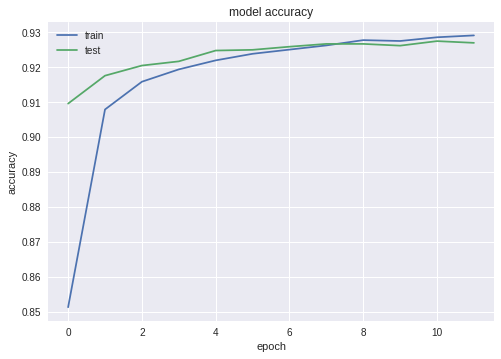

In [8]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()